In [311]:
import pandas as pd
import numpy as np
from scipy.linalg import fractional_matrix_power
import matplotlib.pyplot as plt
import math
from PIL import Image

In [312]:
path = 'measurement_matrix.txt'
data = np.loadtxt(path, dtype=float)
m, n = data.shape
norm_data = np.zeros((m, n))

In [313]:
from numpy.core.fromnumeric import mean
for i in range(0, m):
  norm_data[i, :] = data[i, :] - np.mean(data[i, :])

In [314]:
U, S, V =np.linalg.svd(norm_data)
U3 = U[:, 0:3]

S_temp = np.zeros((m, n))
for i in range(m) :
    for j in range(n) :
        if i == j : S_temp[i,j] = S[j]

W3 = S_temp[0:3, 0:3]
V3 = V[0:3, :]
M = np.dot(U3, fractional_matrix_power(W3, 0.5))
S = np.dot(fractional_matrix_power(W3, 0.5), V3)

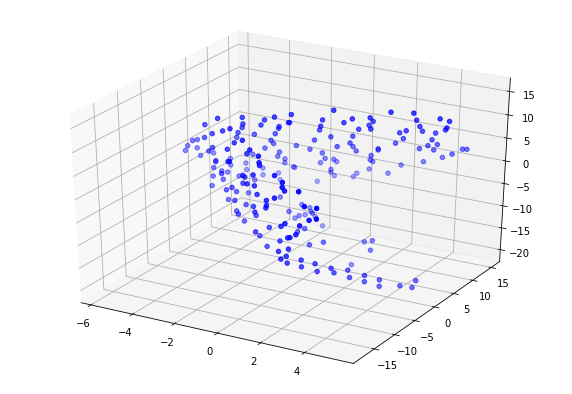

In [315]:
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(S[2, :], S[1, :], S[0, :], color = "blue")
 
# show plot
plt.show()

In [316]:
estimated_D = np.dot(M, S)
per_frame_residual = np.zeros((int(m/2), 1))

In [317]:
def sumsqr(test_list):
  return sum(map(lambda i : i * i, test_list))

In [318]:
estimated_D.shape

(202, 215)

In [319]:
estimated_D[50:51, 1]

array([-118.40707933])

In [320]:
for i in range(1, int(m/2) + 1):
  for j in range(0, n):
    temp = (estimated_D[2*i-2:2*i, j-1] - norm_data[2*i-2:2*i, j-1]).tolist()
    a = sumsqr(temp)
    b = math.sqrt(a)
    
    per_frame_residual[i-1, 0] = per_frame_residual[i-1, 0] + b

In [321]:
selected_frame = [1,50,100]

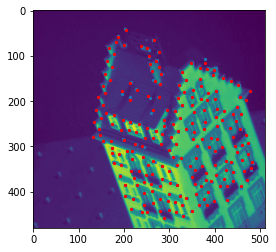

In [322]:
index = selected_frame[0]
image_name = 'frame00000' + '{0:03}'.format(index) + '.jpg'
im = plt.imread(image_name)
implot = plt.imshow(im)
plt.scatter(data[2*index-2, :], data[2*index-1, :], s = 5)
plt.scatter(x=(estimated_D[2*index-2, :] + mean(data[2*index-2, :])), y=estimated_D[2*index-1, :] + mean(data[2*index-1,:]), c='r', s = 5)



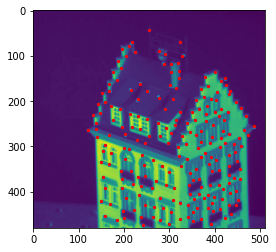

In [323]:
index = selected_frame[1]
image_name = 'frame00000' + '{0:03}'.format(index) + '.jpg'
im = plt.imread(image_name)
implot = plt.imshow(im)
plt.scatter(data[2*index-2, :], data[2*index-1, :], s = 5)
plt.scatter(x=(estimated_D[2*index-2, :] + mean(data[2*index-2, :])), y=estimated_D[2*index-1, :] + mean(data[2*index-1,:]), c='r', s = 5)


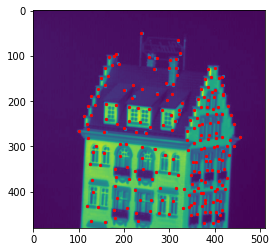

In [324]:
index = selected_frame[2]
image_name = 'frame00000' + '{0:03}'.format(index) + '.jpg'
im = plt.imread(image_name)
implot = plt.imshow(im)
plt.scatter(data[2*index-2, :], data[2*index-1, :], s = 5)
plt.scatter(x=(estimated_D[2*index-2, :] + mean(data[2*index-2, :])), y=estimated_D[2*index-1, :] + mean(data[2*index-1,:]), c='r', s = 5)


In [325]:
print('Total residual: {}'.format(sum(per_frame_residual)))

Total residual: [16428.33206303]


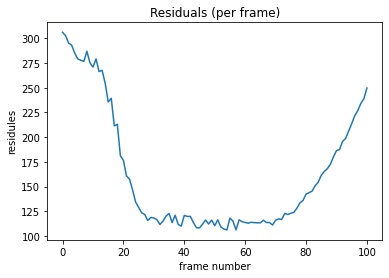

In [326]:
x = per_frame_residual.shape[0]
x_axis = [i for i in range(x)]
y_axis = per_frame_residual.tolist()
plt.plot(x_axis, y_axis)
plt.title('Residuals (per frame)')
plt.xlabel('frame number')
plt.ylabel('residules')
plt.show()

In [327]:
y_axis = per_frame_residual.tolist()
type(y_axis)

list